In [1]:
# there are various ways to match MOSART gridded flow with station observations
# we also need to compare MOSART and CLM (e.g., for small basins)
# here only default parameters are considered

In [2]:
import pandas as pd
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt
import xarray as xr

# Load data

In [3]:
path0 = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_emulator'

In [4]:
# basin info
file = '/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info.csv'
df_info = pd.read_csv(file)

In [13]:
files=[
    "evaluation_many_metrics.csv",
    "evaluation_many_metrics_s-1.csv",
    "evaluation_many_metrics_s1.csv",
    "evaluation_many_metrics_mosart.csv", # use grid with max mean flow
    "evaluation_many_metrics_mosart_s-1.csv", # shift time step by -1
    "evaluation_many_metrics_mosart_s1.csv", # shift time step by 1
    "evaluation_many_metrics_mosartMG.csv", # use grid containing streamflow gauge
    "evaluation_many_metrics_mizuroute.csv", # use grid with max mean flow
    "evaluation_many_metrics_mizuroute_s-1.csv", # shift time step by -1
    "evaluation_many_metrics_mizuroute_s1.csv", # shift time step by 1
    ]

types = ['CLM', 'CLM_s-1', 'CLM_s1', 
         'MOSART_MaxGrid', 'MOSART_MaxGrid_s-1', 'MOSART_MaxGrid_s1', 'MOSART_MatchGauge', 
         'mizuroute', 'mizuroute_s-1', 'mizuroute_s1', ]

metric_all = np.nan * np.zeros([len(df_info), len(types), 24])

for i in range(len(df_info)):
    for j in range(len(types)):
        fileij = f'{path0}/level1_{i}_calib/ctsm_outputs/iter0_trial0/{files[j]}'

        if not os.path.isfile(fileij):
            print('Cannot find', fileij)
        else:
            dfij = pd.read_csv(fileij)
            metric_all[i,j,:] = dfij.values
            metric_names = dfij.columns

Cannot find /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_emulator/level1_24_calib/ctsm_outputs/iter0_trial0/evaluation_many_metrics_mosart.csv
Cannot find /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_emulator/level1_24_calib/ctsm_outputs/iter0_trial0/evaluation_many_metrics_mosartMG.csv
Cannot find /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_emulator/level1_35_calib/ctsm_outputs/iter0_trial0/evaluation_many_metrics_mosart.csv
Cannot find /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_emulator/level1_35_calib/ctsm_outputs/iter0_trial0/evaluation_many_metrics_mosart_s-1.csv
Cannot find /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_emulator/level1_35_calib/ctsm_outputs/iter0_trial0/evaluation_many_metrics_mosart_s1.csv
Cannot find /glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_emulator/level1_35_calib/ctsm_outputs/iter0_trial0/evaluation_many_metrics_mosartMG.csv
Canno

# analysis and plot

In [14]:
df_kge = pd.DataFrame(metric_all[:,:,0], columns=types)
df_kge.head()

,CLM,CLM_s-1,CLM_s1,MOSART_MaxGrid,MOSART_MaxGrid_s-1,MOSART_MaxGrid_s1,MOSART_MatchGauge,mizuroute,mizuroute_s-1,mizuroute_s1
0,-0.158664,-0.198027,-0.131488,0.099301,0.073924,0.117194,-0.003637,0.140968,0.112609,0.160861
1,0.129546,0.074776,0.103858,0.248494,0.248933,0.197268,0.248494,0.452469,0.491375,0.384773
2,0.019374,-0.034886,0.048916,0.206452,0.184251,0.211869,0.179966,0.309660,0.292816,0.312469
3,0.543257,0.530903,0.426822,0.446003,0.527870,0.365156,0.446003,0.559835,0.637952,0.498442
4,0.337249,0.373811,0.213847,0.329097,0.447001,0.253569,0.329097,0.364291,0.447570,0.303331


In [15]:
df_kge.mean(), df_kge.median()

(CLM                  -1.212886
 CLM_s-1              -1.192174
 CLM_s1               -1.301436
 MOSART_MaxGrid       -0.833942
 MOSART_MaxGrid_s-1   -0.746219
 MOSART_MaxGrid_s1    -0.892754
 MOSART_MatchGauge    -0.849398
 mizuroute            -1.008546
 mizuroute_s-1        -0.938501
 mizuroute_s1         -1.057659
 dtype: float64,
 CLM                   0.195203
 CLM_s-1               0.194844
 CLM_s1                0.099550
 MOSART_MaxGrid        0.153411
 MOSART_MaxGrid_s-1    0.238287
 MOSART_MaxGrid_s1     0.084103
 MOSART_MatchGauge     0.075075
 mizuroute             0.207887
 mizuroute_s-1         0.292495
 mizuroute_s1          0.150718
 dtype: float64)

## Is time shift necessary?
Shift by -1 day (similart o SUMMA) is the best

In [16]:

for t in ['CLM', 'MOSART_MaxGrid', 'mizuroute']:

    d1 = metric_all[:,types.index(t),0]
    d2 = metric_all[:,types.index(f'{t}_s-1'),0]
    d3 = metric_all[:,types.index(f'{t}_s1'),0]
    print(f'{t} s-1 better than s0', np.sum(d2>d1)/np.sum(~np.isnan(d1)))
    print(f'{t} s1 better than s0', np.sum(d3>d1)/np.sum(~np.isnan(d1)))


CLM s-1 better than s0 0.543859649122807
CLM s1 better than s0 0.22009569377990432
MOSART_MaxGrid s-1 better than s0 0.7928802588996764
MOSART_MaxGrid s1 better than s0 0.15048543689320387
mizuroute s-1 better than s0 0.835725677830941
mizuroute s1 better than s0 0.14992025518341306


## Routing benefit

In [17]:
for t in ['MOSART_MaxGrid_s-1', 'mizuroute_s-1']:

    d1 = metric_all[:,types.index('CLM'),0]
    d2 = metric_all[:,types.index(t),0]
    print(f'{t} better than CLM', np.sum(d2>d1)/np.sum(~np.isnan(d1)))


MOSART_MaxGrid_s-1 better than CLM 0.6618819776714514
mizuroute_s-1 better than CLM 0.7113237639553429


## basin area VS routing

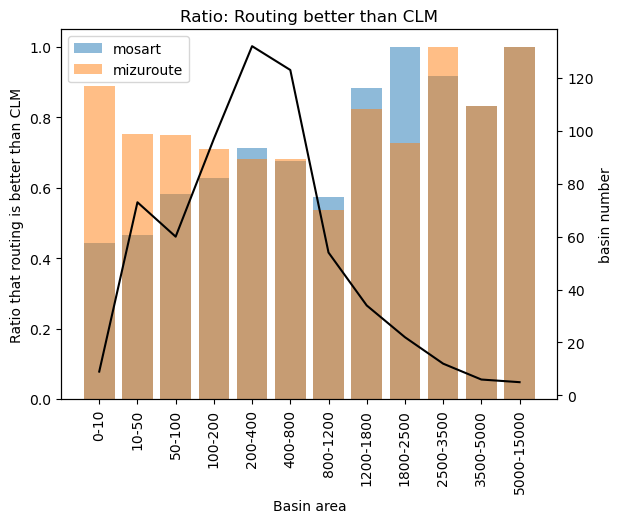

In [18]:
# where MOSART performance is related to basin areas
d1 = metric_all[:,types.index('CLM'),0]
d2 = metric_all[:,types.index('MOSART_MaxGrid_s-1'),0] # shift -1
d3 = metric_all[:,types.index('mizuroute_s-1'),0] # shift -1
area = df_info['areaUSGS'].values

area_bins = [0, 10, 50, 100, 200, 400, 800, 1200, 1800, 2500, 3500, 5000, 15000]
ratio_mosart = np.zeros(len(area_bins)-1)
ratio_mizuroute = np.zeros(len(area_bins)-1)
area_bincen = np.zeros(len(area_bins)-1)
area_binrange = []
basinnum = []
for i in range(len(area_bins)-1):
    indi = (area>=area_bins[i]) & (area<area_bins[i+1])
    area_bincen[i] = (area_bins[i]+area_bins[i+1])/2
    area_binrange.append(f"{area_bins[i]}-{area_bins[i+1]}")
    basinnum.append(np.sum(indi))
    di = d2[indi] > d1[indi]
    ratio_mosart[i] = np.sum(di) / len(di)

    di = d3[indi] > d1[indi]
    ratio_mizuroute[i] = np.sum(di) / len(di)

# Plot the bar chart
fig, ax1 = plt.subplots()

# First axis for the bar plot
ax1.bar(area_binrange, ratio_mosart, alpha=0.5, label='mosart')
ax1.bar(area_binrange, ratio_mizuroute, alpha=0.5, label='mizuroute')
ax1.set_xlabel('Basin area')
ax1.set_ylabel('Ratio that routing is better than CLM')
plt.legend()

# Rotate the x-axis labels
ax1.set_xticks(range(len(area_binrange)))
ax1.set_xticklabels(area_binrange, rotation=90)

# Create a second x-axis (twin x-axis)
ax2 = ax1.twinx()
ax2.plot(area_binrange, basinnum, color='k')
ax2.set_ylabel('basin number')

ax1.set_title('Ratio: Routing better than CLM')

# Display the plot
plt.show()


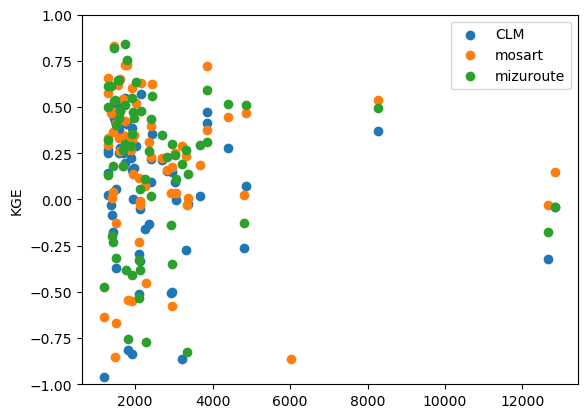

In [19]:
# compare clm and mosart and mizuroute in large basin
d1 = metric_all[:,types.index('CLM'),0]
d2 = metric_all[:,types.index('MOSART_MaxGrid_s-1'),0] # shift -1
d3 = metric_all[:,types.index('mizuroute_s-1'),0] # shift -1
area = df_info['areaUSGS'].values
ind = area > 1200
plt.scatter(area[ind], d1[ind], label='CLM')
plt.scatter(area[ind], d2[ind], label='mosart')
plt.scatter(area[ind], d3[ind], label='mizuroute')
plt.ylim([-1,1])
plt.ylabel('KGE')
plt.legend()
plt.show()

In [20]:
# where mosart failed
d1 = metric_all[:,types.index('CLM'),0]
d2 = metric_all[:,types.index('MOSART_MaxGrid_s-1'),0] # shift -1
print(df_info['areaUSGS'].values[np.isnan(d2)])
print(df_info['areaUSGS'].values[np.isnan(d1)])


[14.84  9.7   9.   20.31  4.03  8.9  10.42 59.46 15.67]
[]


# spatial map

0.1952032652918867 0.23828694330024042 0.2924950605896708
0.08688209134217434 0.10552272022178044


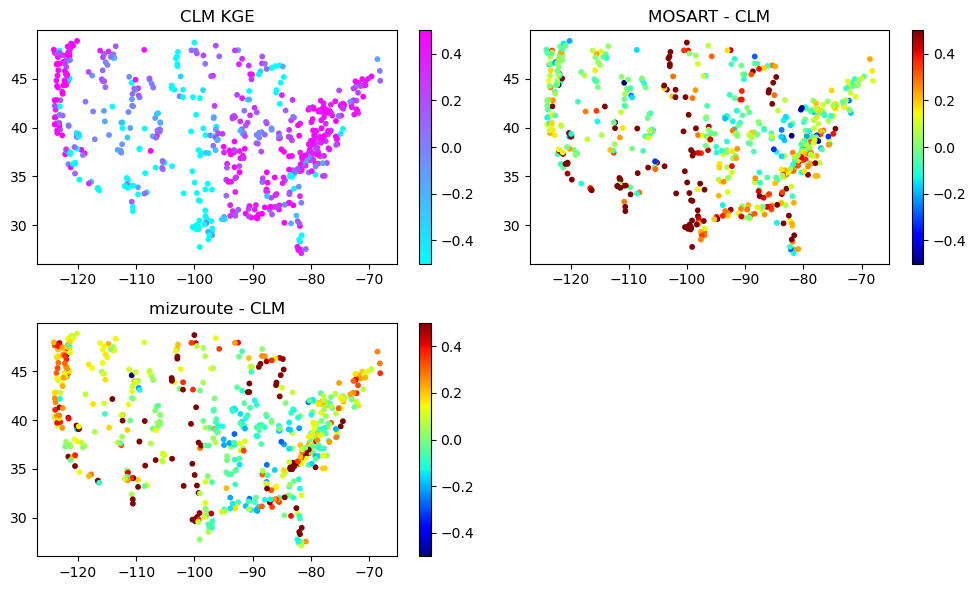

In [21]:
d1 = metric_all[:,types.index('CLM'),0]
d2 = metric_all[:,types.index('MOSART_MaxGrid_s-1'),0] # shift -1
d3 = metric_all[:,types.index('mizuroute_s-1'),0] # shift -1
lat = df_info['lat_cen'].values
lon = df_info['lon_cen'].values

print(np.nanmedian(d1), np.nanmedian(d2), np.nanmedian(d3), )
print(np.nanmedian(d2-d1), np.nanmedian(d3-d1))

fig = plt.figure(figsize=[10, 6])
vmin, vmax = -0.5, 0.5

fig.add_subplot(2,2,1)
plt.scatter(lon, lat, 10, d1, cmap='cool', vmin=vmin, vmax=vmax)
plt.title('CLM KGE')
plt.colorbar()

fig.add_subplot(2,2,2)
plt.scatter(lon, lat, 10, d2-d1, cmap='jet', vmin=vmin, vmax=vmax)
plt.title('MOSART - CLM')
plt.colorbar()

fig.add_subplot(2,2,3)
plt.scatter(lon, lat, 10, d3-d1, cmap='jet', vmin=vmin, vmax=vmax)
plt.title('mizuroute - CLM')
plt.colorbar()

plt.tight_layout()
plt.show()